# Time Series Analysis

In this exercise we'll attempt to predict Bitcoin prices with Python.

How to approach time series data manipulation and how you can use it in your everyday work. 

The BTC price movements from January to March of 2015 will be used, a time in which bitcoin largely went sideways. The price data will be pulled from Coinbase.



In [24]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams['figure.figsize'] = [18, 6]
plt.rcParams['axes.grid'] = True

In [2]:
# Data from Kaggle.
df = pd.read_csv('data/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv', index_col=0)

/usr/local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.index = [datetime.utcfromtimestamp(x) for x in df.index]

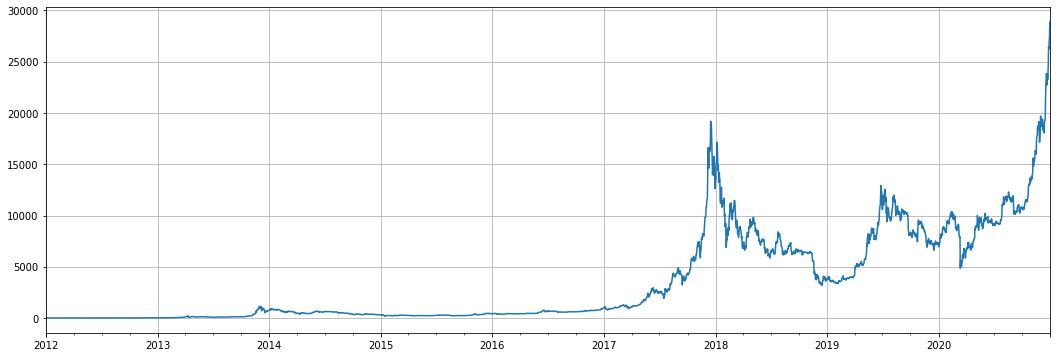

In [26]:
df.resample('1D')['Close'].last().plot();

## See the last 10 rows of the data.

In [ ]:
# Weighted_Price is the Volume Weighted Average Price.
df.tail(10)

## Let's visualize each of the columns.

In [ ]:
# Plot the Open, High, Low, Close and Volume in a chart.

Notice how long it takes to do that... Do you need to see every single minute plotted on the graph?

## How many data samples do we have?

In [ ]:
df.shape

In [ ]:
# Resample to daily bars and plot again.

## What is the format of the dates in the data? From what date to what date and at what granularity?

TYPE HERE

## How many NaNs do we have? Are they at specific hours? Why are they NaNs?

## Let's see what happened in 2017...

In [ ]:
# Print the first 20 rows

## We need to fill in the missing data, or can we get rid of it?

In [ ]:
## This is an art as much as it is a science....
# Fill the data accordingly, column by column.

In [ ]:
march17 = 

# Let's take daily closes as our data from now on...

In [ ]:
# Take the daily close of the data and plot it.

In [ ]:
# We want to see the data in percent change so that it's comparable across the board.

# We can also use log-returns, up to you.
# For a better understanding of log-returns in finance, read this: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

# Why would we not use absolute returns?

In [ ]:
## Plot the daily distribution of percent returns as a density plot using sns.distplot

In [ ]:
## The data is rather noisy. Why don't we take a moving average to smooth it out.

In [ ]:
## The problem with a moving average is that it weighs the last value as much as the newest value.
# For this, we'll use an exponentially weighted moving average, which you can find here: https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.ewma.html

In [ ]:
## Now let's visualize our moving averages compared to the actual closing prices.

In [ ]:
## Let's see what our rolling standard deviation is over time.

In [ ]:
## Now, we want to compare the moves today with the historical moves of the underlying (bitcoin, in this case).
## What can we apply to the data in order to do this?
# HINT: z-score

In [ ]:
## Now let's make a simple trading strategy!
# We have two options: either we are trend-following or mean reverting.
# Trend following means that if it's going up, we buy because it will continue going up.
# Mean reversion means that if it goes down, it is bound to come back up.
# This is also where a lot of domain knowledge comes into play.

In [ ]:
df['Close'].resample('1D').last().plot()
plt.grid()